✅ Optimal Price: ₹364.00
💰 Maximum Profit: ₹11198.96


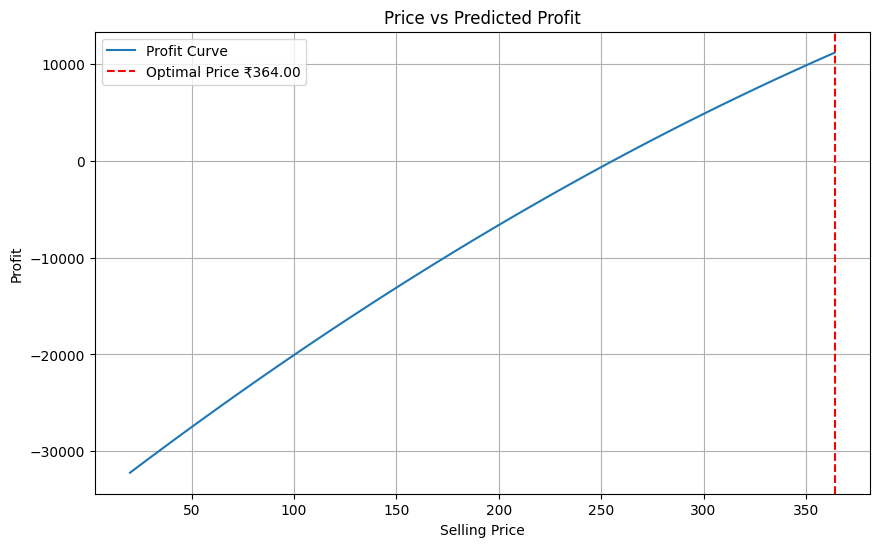

In [23]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings

# Optional: Ignore sklearn warnings
warnings.filterwarnings("ignore")

# STEP 2: Load dataset
df = pd.read_csv("retail_price.csv")  # Make sure the file is uploaded or in the working directory

# STEP 3: Preprocessing
df.dropna(inplace=True)  # Remove missing values

# STEP 4: Feature Engineering
df['Profit'] = df['unit_price'] - df['total_price']
df['Revenue'] = df['unit_price'] * df['qty']
df['Margin (%)'] = (df['Profit'] / df['total_price']) * 100

# STEP 5: Prepare features and target
X = df[['unit_price', 'total_price']]   # Independent variables
y = df['qty']                # Target variable (demand)

# STEP 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# STEP 8: Predict demand, revenue, and profit
df['Predicted_Demand'] = model.predict(df[['unit_price', 'total_price']])
df['Predicted_Revenue'] = df['Predicted_Demand'] * df['unit_price']
df['Predicted_Profit'] = (df['unit_price'] - df['total_price']) * df['Predicted_Demand']

# STEP 9: Price Optimization
price_range = np.linspace(df['unit_price'].min(), df['unit_price'].max(), 100)
profits = []

for price in price_range:
    input_df = pd.DataFrame([[price, df['total_price'].mean()]], columns=['unit_price', 'total_price'])
    predicted_demand = model.predict(input_df)[0]
    profit = (price - df['total_price'].mean()) * predicted_demand
    profits.append(profit)

optimal_price = price_range[np.argmax(profits)]
max_profit = max(profits)

# STEP 10: Show optimal result
print(f"✅ Optimal Price: ₹{optimal_price:.2f}")
print(f"💰 Maximum Profit: ₹{max_profit:.2f}")

# STEP 11: Plotting
plt.figure(figsize=(10, 6))
plt.plot(price_range, profits, label='Profit Curve')
plt.axvline(optimal_price, color='red', linestyle='--', label=f'Optimal Price ₹{optimal_price:.2f}')
plt.title("Price vs Predicted Profit")
plt.xlabel("Selling Price")
plt.ylabel("Profit")
plt.legend()
plt.grid(True)
plt.show()